In [94]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

## Problem statement

The goal of this lab is to perform classification, using logistic regression, on simple self-generated data.

We'll create the data using sklearn's make_blobs.

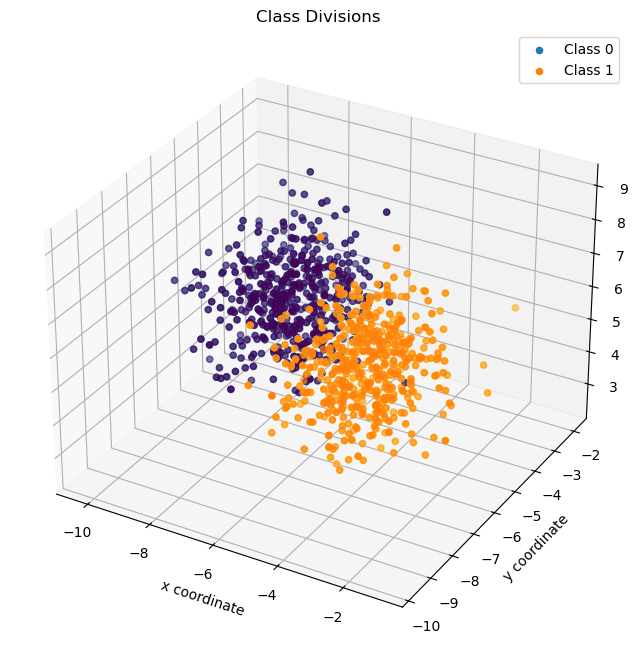

In [95]:
coordinates, labels = make_blobs(n_samples=[500,500], 
                                 n_features=3, random_state=104)

# visualisera de nyss skapade blobsen

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")

ax.scatter3D(coordinates[:,0],
             coordinates[:,1],
             coordinates[:,2], 
             c=labels)

for label in set(labels):
    indices = labels == label
    ax.scatter3D(coordinates[indices, 0], coordinates[indices, 1], coordinates[indices, 2], label=f'Class {label}')

ax.legend()

ax.set_xlabel('x coordinate')
ax.set_ylabel('y coordinate')
ax.set_zlabel('z coordinate')

ax.set_title("Class Divisions");

To make this more explicit, let's make a df out of this data

In [96]:
df = pd.DataFrame(coordinates).rename(columns={0:'x', 1:'y', 2:'z'})
df['class'] = labels
df

,x,y,z,class
0,-7.800351,-7.042705,5.963284,0
1,-4.048452,-7.293812,5.132414,1
2,-2.485358,-7.547218,4.970742,1
3,-4.381966,-6.730893,5.092438,1
4,-3.511412,-6.218532,4.869813,1
...,...,...,...,...
995,-6.969128,-7.313662,8.038005,0
996,-6.873303,-7.277550,5.182108,0
997,-3.050327,-6.345468,6.989217,1
998,-5.713515,-5.746681,6.731784,0


In [97]:
df['class'].value_counts()

class
0    500
1    500
Name: count, dtype: int64

As seen above, we now have three features and one target. We want to train a model to be able to classify points in space to either class 0, or class 1.
  

**Train/test split**

In [98]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns=['class']).values, df['class'].values

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size, 
                                                    random_state=42)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(800, 3)
(800,)
(200, 3)
(200,)


We need to reshape our targets. The features are already 2D, as required.

In [99]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(y_train.shape)
print(y_test.shape)

(800, 1)
(200, 1)


**Initialize a logistic regression classifier model** 

In [100]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

#train the model
logistic_model.fit(X_train, y_train)

c:\Users\Leyla\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Evaluate the model**

Now predict on both train and test set

In [101]:
# vi kan använda predict_proba för att få ut predicted sannolikhet för respektive klass

y_train_hats_probabilities = logistic_model.predict_proba(X_train)
y_test_hats_probabilities = logistic_model.predict_proba(X_test)

In [102]:
y_train_hats_probabilities[0]

array([7.81053526e-04, 9.99218946e-01])

In [103]:
9.992*10**(-1) + 7.81*10**(-4)

0.9999810000000001

In [104]:
y_test_hats_probabilities[0]

array([9.99942675e-01, 5.73253934e-05])

In [105]:
9.99942675*10**(-1) + 5.73253934*10**(-5)

1.0000000003934

In [106]:
# vi kan använda predict för att direkt få ut den mest sannolika klassen

y_train_hats = logistic_model.predict(X_train)
y_test_hats = logistic_model.predict(X_test)

Have a look at our predictions on the test set

In [107]:
y_test_hats

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0])

Accuracy is a pretty neat measure to use when performing binary classification

In [108]:
from sklearn.metrics import accuracy_score

print('Train accuracy:')
print(accuracy_score(y_train, y_train_hats))
print('Test accuracy:')
print(accuracy_score(y_test, y_test_hats))

Train accuracy:
0.9575
Test accuracy:
0.92


However, accuracy is **not** the end of the story here. Let's dive deeper into these results to try to do some *error analysis**.

A confusion matrix allows us to understand better how to interpret our results here.

In [109]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_hats)

cm

array([[89,  7],
       [ 9, 95]], dtype=int64)

Ok, to understand the numbers above. Let's do a better plot.

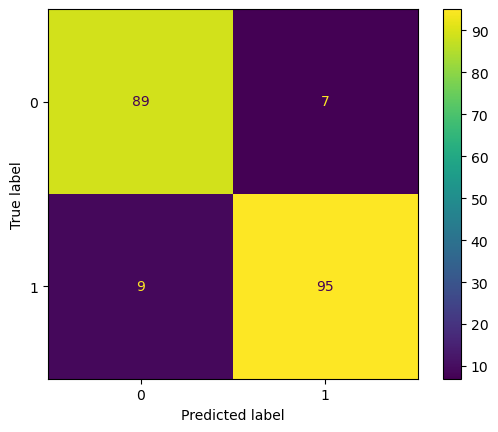

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_test, y_pred=y_test_hats)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show() 

---

## Challanges

**Task 1**

For the model trained above, run the code to predict the class for the following (new) data point.

Does the models prediction make sense? Try looking at the graph at the top and see if checks out.

In [ ]:
x = np.array([-2,-5,3])

x = x.reshape(1,3)        # note that the model now expects a single data point to have 1 row, and 3 columns (features)

In [112]:
logistic_model.predict_proba(x)

array([[1.55151952e-05, 9.99984485e-01]])

**Task 2**

Try changing the coordinates of the new data point above, so that it predicts the opposite class of what it did in Task 1.

In [113]:
x = np.array([-8,-5,3])

x = x.reshape(1,3)

logistic_model.predict_proba(x)

array([[9.99460832e-01, 5.39168036e-04]])

In [128]:
# how about an ambigious point?

x = np.array([-5.575,-5,3])

x = x.reshape(1,3)

logistic_model.predict_proba(x)

array([[0.50200051, 0.49799949]])

**Task 3**

Read more about how to interpret the confusion matrix [here](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/).
Make sure you understand the concepts precision, recall and accuracy.

**Task 4**

Above, we only implemented a simple train/test split. Instead, perform the training and assess performance using 5-fold cross-validation, instead.

Use accuracy as score :)